# Checkerboard Universe Summary

In class, we did an exercise titled Checkerboard Universe where you investigated "rules" of a universe by placing a checker on the board. Your lab partner confirmed whether a checker is allowed or not, and you removed the checker if it was not allowed. By placing checkers and observing the pattern, you guessed at the rule.

In this follow-up to the activity, we will look more deeply into the reasoning we used and compare it to reasoning used in science. We'll also use this opportunity to learn about **Google Colab** and how to edit a **Jupyter notebook** document in Colab.

## Introduction

Suppose that you observe the board with two checkers arranged in the configuration shown below. Note the definitions of rows and columns.

<img src="01.png" width=400>

If you are a chess player, note that we are using a different convention for labeling the rows and columns than is generaly used in chess. 

The checkerboard grid can be thought of mathematically as an array. Each square is described by a location $[row,column]$ where the row numbers are horizontal and the column numbers are vertical. The red checker is at $[7,2]$ and the black checker is at $[7,3]$.

Naming the squares like this allows us to more clearly describe the location of a checker.

### Exercise 1 -- Observations

Make a list of 6 observations for the given arrangement of checkers on the board. The first observation in the list is given as an example. In Colab, double-click this cell and it is now in *edit* mode. After editing the text, simultaneously type `shift-enter` on your keyboard to render the text.

 1. Both checkers are in row 7.
 2. ...

### Exercise 2 -- Hypotheses

Here are three hypotheses that are consistent with the observation. Add three more hypotheses that are consistent with the observation.

1. Black checkers must be on white squares and red checkers must be on black squares.
1. Checkers must be on odd numbered rows.
1. Checkers are in pairs, with 1 black checker adjacent to 1 red checker. (They cannot touch other pairs.)

## Deductive and Inductive Reasoning

Reasoning can be characterized as **deductive** or **inductive**.

Using inductive reasoning, observations lead to possible hypotheses. You used inductive reasoning in the previous exercise.

Using deductive reasoning, a person uses a hypothesis to make predictions and then uses observations (or experiments) to test those predictions and possibly falsify the hypothesis.

### Exercise 3 -- Deductive Reasoning

For one of the hypotheses that you created above, describe how you would place a checker to test consistency with (i.e. confirm) the hypothesis and describe how you would place a checker to falsify the hypothesis. Here is an example of what you should write.

**Hypothesis: Black checkers must be on white squares and red checkers must be on black squares**.

To confirm, place a black checker on $[7,0]$ and a red checker on $[7,1]$ and see if it's allowed. To falsify, place a black checker on $[7,1]$ and a red checker on $[7,0]$ and see if it's NOT allowed.


## Falsifying Hypotheses

### Exercise 4

You take a new observation of the board and find that the following arrangement is also allowed.

<img src="02.png" width=400>

Which of the following hypotheses are falsified by the two new checkers (at $[4,0]$ and $[5,0]$) that were added to the board? For the list, indicate which hypotheses are falsified by this new observation by striking through the text. To strike through text using markdown, use a double tilda like this: ``~~text~~`` to produce this: ~~text~~.

1. Black checkers must be on white squares and red checkers must be on black squares.
1. Checkers must be on odd numbered rows.
1. Checkers are in pairs, with 1 black checker and 1 red checker.
1. Checkers must be on the left half of the board (columns 0-3).
1. Checkers must be on the bottom half of the board (rows 4-7).
1. Checkers must be on the perimeter of the board (in row 0 or in column 0 or in row 7 or in column 7).
1. Checkers must be adjacent to at least one other checker.

### More Data

Here is a new set of observations.

<img src="03.png" width=400>

Which hypotheses can you now falsify?  Copy and paste your previous list of hypotheses and strike through the new falsified hypotheses.

### More Data

Here is a new set of observations.

<img src='04.png' width=400>

Which hypotheses can you now falsify?  Copy and paste your previous list of hypotheses and strike through the new falsified hypotheses.

### More Data

Here is a new set of observations.

<img src='05.png' width=400>

Which hypotheses can you now falsify?  Copy and paste your previous list of hypotheses and strike through the new falsified hypotheses.

### Even More Data

Here is a new set of observations.

<img src="06.png" width=400>

1. Are any of our previous hypotheses plausible? If so, list them.
1. Can you write a new hypothesis that is consistent with this observation (and by necessity all previous observations)?
1. If a prediction (and subsequent observation or measurement) is consistent with a hypothesis, does it make the hypothesis true. (By "true" we mean that the hypothesis is plausible for most or all future predictions.)
1. Can experiments (or observations) prove a hypothesis?
1. Can experiments (or observations) falsify a hypothesis?

# Drawing a checkerboard and checkers

In a previous notebook, you learned how to create and use functions. Functions allow you to reuse code in an efficient way (intead of copying and pasting the same code block every time you need it). In this activity, you will use functions to draw a checkerboard and checkers.

## Importing packages

Packages provide functionality not already available in Python. When you installed Anaconda, it included many common packages used in science. The following `import` statements import a package `matplotlib` for graphing and a package `numpy` for defining and using arrays.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Creating functions

When we want to run the same code more than once, we put it into a function and then call the function when we need it. In this case, we need three functions:

1. a function to create a checkerboard
2. a function to create a red checker at the location where we want it
3. a function to create a black checker at the location where we want it

Run the following cell to create these functions.

In [2]:
redCheckers = [] # global list of coordinates of red checkers
blackCheckers = [] # global list of coordinates of red checkers

def drawCheckerboard():
    # Make a 8x8 grid with default 0
    nrows, ncols = 8,8
    image = np.zeros(nrows*ncols)
    image = image.reshape((nrows, ncols))

    # Set every other cell in a row to 1; alternate starting cell color in a row
    c=0

    cmaptype = 'binary'
    darkcolor = 0.5
    lightcolor = 0
    dark = darkcolor
    light = lightcolor
    for i in range(nrows):
        for j in range(ncols):
            if c % 2 == 0:
                image[i,j] = dark
            else:
                image[i,j] = light
            c = c + 1
        if dark==darkcolor:
            dark = lightcolor
            light = darkcolor
        else:
            dark = darkcolor
            light = lightcolor

    # produce checkerboard
    fig, ax = plt.subplots(figsize=(8,8))
    ax.matshow(image, cmap=cmaptype, aspect='equal', vmin=0, vmax=1)
    
    # draw red checkers
    for c in redCheckers:
        R = 0.25
        colorstr='r'
        checker = plt.Circle((c[1],c[0]), R, color=colorstr)
        ax.add_artist(checker)

    # draw black checkers
    for c in blackCheckers:
        R = 0.25
        colorstr='k'
        checker = plt.Circle((c[1],c[0]), R, color=colorstr)
        ax.add_artist(checker)
    
def addRedChecker(coord=[0,0]):
    global redCheckers
    redCheckers.append(coord)
    
def addBlackChecker(coord=[0,0]):
    global blackCheckers
    blackCheckers.append(coord)

def eraseCheckers():
    global redCheckers
    global blackCheckers
    redCheckers = []
    blackCheckers = []


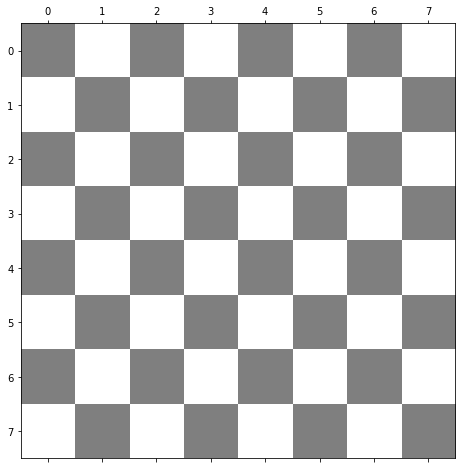

In [3]:
drawCheckerboard()

Call `addRedChecker()` or `addBlackChecker` to add checkers to the board. Specifiy the coordinates of the checker as a list, $[row,column]$.

Here is an example that produces the image shown earlier.

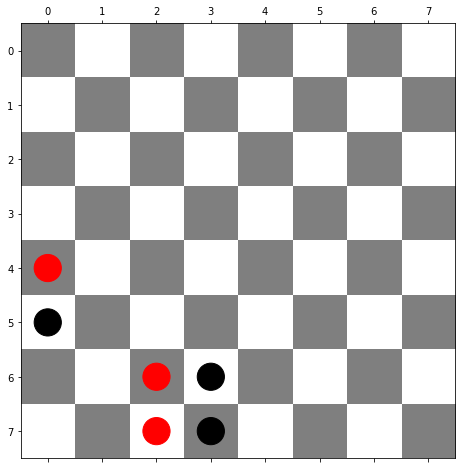

In [8]:
addRedChecker([6,2])
addBlackChecker([6,3])
drawCheckerboard()

Try adding more red and black checkers to the board.

## Example

Let's create a new checkerboard that looks like the image below.

<img src='02.png' width=400>

The steps are:

1. Call `createCheckerboard()` to create the checkerboard.
2. Call `addRedChecker(figure, axes, [row,col])` or `addBlackChecker(figure, axes, [row,col])` to create checkers.

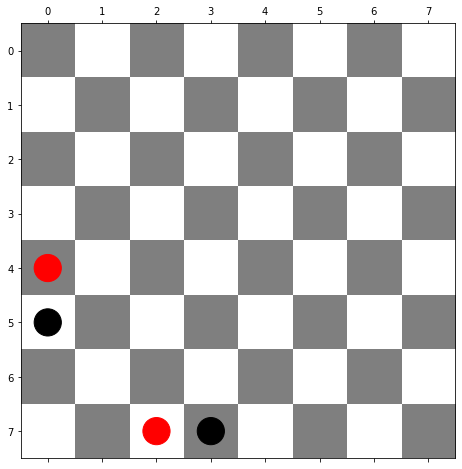

In [7]:
eraseCheckers()
addRedChecker([7,2])
addRedChecker([4,0])
addBlackChecker([7,3])
addBlackChecker([5,0])
drawCheckerboard()

## Exercise 5

Write a "rule" for a Checkerboard Universe and use code, like in the previous example, to create an interesting checkerboard pattern that fits the rule. Create more than ten checkers.